# WHO Measles Coverage Analysis - Nooruddin Butt

### Objective of this Notebook

The primary objective of this analysis is to evaluate the impact of the introduction and increasing coverage of the second dose of the measles-containing vaccine (MCV2) on the global incidence rates of measles. Since the introduction of MCV2 in 2000, it is essential to determine whether this additional vaccine dose has contributed to better control of measles outbreaks across different regions. The analysis aims to provide insights into the effectiveness of MCV2 in reducing measles cases and to identify any regional disparities that may require targeted intervention.

Structure of the Notebook
1. Data Cleaning

- Data Import
- Correcting Data Types
- Reshape Data
- Merge Data
- Remove Unnecessary Columns

2. Feature Engineering

- Create Columns to Understand the Impact of Features: Engineer new features such as separate columns for MCV1 and MCV2 coverage, doses, and target numbers to facilitate a more granular analysis of their impact on incidence rates.

3. Exploratory Data Analysis (EDA)

- Understanding Data Distribution: Analyze the distribution of key variables to identify patterns, trends, and outliers that may influence the results.

- Comparative Analysis of Pre-MCV2 (1980-1999) vs. Post-MCV2 (2000-2023) Eras: Examine how the introduction of MCV2 has affected measles incidence by comparing two distinct time periods.

- Correlation Matrix: Generate a correlation matrix to explore the relationships between various features, particularly focusing on MCV1 and MCV2 coverage and their impact on incidence rates.

- Impact of MCV1 and MCV2 Coverage on Measles Incidence Rate: Evaluate how the coverage of MCV1 and MCV2 individually correlates with the reduction of measles cases globally.

- MCV1 and MCV2 Coverage Impact Across Global Regions: Analyze the impact of MCV1 and MCV2 coverage on measles incidence rates across different WHO regions to identify regional trends and disparities.

- Comparative Analysis of MCV1 and MCV2 Coverage Across Global Regions: Compare the coverage levels of MCV1 and MCV2 across regions to assess vaccination program effectiveness and highlight areas needing improvement.

- Relationship Between MCV1 and MCV2 Coverage: Investigate the relationship between the coverage levels of MCV1 and MCV2 to understand how they interact and influence each other.

- High MCV1 & MCV2 Coverage vs High MCV1 Only: Compare regions with high coverage of both MCV1 and MCV2 against those with high MCV1 coverage only, analyzing their relative impact on measles incidence rates.

4. Insights and Recommendations

### Data Cleaning

In [76]:
# Load Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the environemnt 
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# Turn off warnings for final notebook
import warnings 
warnings.filterwarnings('ignore')

#### Import Dataset 1 (Incidence Data)

In [78]:
incidence_data = pd.read_excel('C:/Users/nooru/OneDrive/Desktop/InnovationNexo/Portfolio Data Science/WHO job/Measles reported cases and incidence 2024-28-08 15-53 UTC.xlsx')

incidence_data.head()

,CODE,REGION,Disease,Denominator,2023,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984,1983,1982,1981,1980
0,AFR,African Region,Measles,"per 1,000,000 total population",343.0,80.5,80.8,104.8,551.8,114.9,68.2,35.9,52.2,75.0,178.5,121.4,215.4,228.0,98.2,44.7,94.9,126.8,426.6,296.2,557.9,409.7,723.8,821.3,753.3,627.3,484.7,815.0,628.2,758.5,733.8,"1,074.5",960.0,979.3,"1,137.5","1,256.3","1,421.5","1,547.6","2,730.5","2,563.8","3,250.4","3,338.4","3,624.8","3,402.6"
1,EMR,Eastern Mediterranean Region,Measles,"per 1,000,000 total population",122.8,80.9,39.2,10.1,26.0,88.2,53.1,9.3,30.8,26.7,32.0,52.8,55.3,16.3,60.8,20.4,27.3,41.5,29.4,110.6,105.6,87.5,82.0,85.8,151.2,191.4,77.1,50.0,50.9,61.6,130.0,235.4,169.0,166.2,228.7,356.9,495.7,512,708.1,694.4,983.7,"1,148.3","1,604","1,263.7"
2,EUR,European Region,Measles,"per 1,000,000 total population",71.0,0.9,0.1,13.3,115.0,95.8,26.3,5.2,29.6,19.1,33.4,34.0,43.0,34.1,8.9,10.4,7.9,61.6,42.7,33.6,35.1,55.3,85.7,49.8,61.2,110.4,275.1,231.3,199.1,247.2,439.5,429.9,396.8,273.6,826.9,629.3,329.8,871,773.9,700.1,"1,249.5",913.2,979.5,"1,053"
3,AMR,Region of the Americas,Measles,"per 1,000,000 total population",0.0,0.1,0.7,9.8,32.6,16.6,1.1,0.1,0.6,2.0,0.5,0.2,1.4,0.3,0.1,0.2,0.2,0.3,0.1,0.1,0.1,3.0,0.7,2.1,3.9,17.8,67.3,2.4,8.4,31.4,77.0,137.2,218.1,304.4,194.4,191.5,221,337.2,300.9,310.4,213.9,243.4,406.4,422.2
4,SEAR,South-East Asia Region,Measles,"per 1,000,000 total population",40.7,23.6,3.3,4.8,14.7,17.3,14.3,14.0,25.1,23.1,12.9,16.8,37.4,29.6,46.6,40.6,41.7,56.4,51.8,66.2,56.8,46.9,50.7,50.3,31.1,41.0,77.1,69.3,69.7,107.1,101.4,123.5,157.6,171.4,344.6,232.7,258.8,166.8,206.9,261.8,184.6,234.7,283.9,189.6


In [79]:
incidence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODE         6 non-null      object 
 1   REGION       6 non-null      object 
 2   Disease      6 non-null      object 
 3   Denominator  6 non-null      object 
 4   2023         6 non-null      float64
 5   2022         6 non-null      float64
 6   2021         6 non-null      float64
 7   2020         6 non-null      float64
 8   2019         6 non-null      float64
 9   2018         6 non-null      float64
 10  2017         6 non-null      float64
 11  2016         6 non-null      float64
 12  2015         6 non-null      float64
 13  2014         6 non-null      float64
 14  2013         6 non-null      float64
 15  2012         6 non-null      float64
 16  2011         6 non-null      float64
 17  2010         6 non-null      float64
 18  2009         6 non-null      float64
 19  2008        

In [80]:
# Remove commas and convert the columns to numeric
for col in [1992, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980]:
    incidence_data[col] = incidence_data[col].astype(str).str.replace(',', '')
    incidence_data[col] = pd.to_numeric(incidence_data[col])

In [81]:
incidence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CODE         6 non-null      object 
 1   REGION       6 non-null      object 
 2   Disease      6 non-null      object 
 3   Denominator  6 non-null      object 
 4   2023         6 non-null      float64
 5   2022         6 non-null      float64
 6   2021         6 non-null      float64
 7   2020         6 non-null      float64
 8   2019         6 non-null      float64
 9   2018         6 non-null      float64
 10  2017         6 non-null      float64
 11  2016         6 non-null      float64
 12  2015         6 non-null      float64
 13  2014         6 non-null      float64
 14  2013         6 non-null      float64
 15  2012         6 non-null      float64
 16  2011         6 non-null      float64
 17  2010         6 non-null      float64
 18  2009         6 non-null      float64
 19  2008        

In [82]:
# Reshape the data from wide to long format
incidence_long = pd.melt(
    incidence_data, 
    id_vars=['CODE', 'REGION', 'Disease', 'Denominator'],  # Columns to keep fixed
    value_vars=range(1980, 2024),  # Correct year range: 1980 to 2023 (Python's range is exclusive at the end)
    var_name='Year',  # The name for the new 'Year' column
    value_name='Incidence_Rate'  # The name for the new 'Incidence_Rate' column
)

# Convert the 'Year' column to numeric
incidence_long['Year'] = incidence_long['Year'].astype(int)

# Inspect the first few rows to verify
incidence_long.head()


,CODE,REGION,Disease,Denominator,Year,Incidence_Rate
0,AFR,African Region,Measles,"per 1,000,000 total population",1980,3402.6
1,EMR,Eastern Mediterranean Region,Measles,"per 1,000,000 total population",1980,1263.7
2,EUR,European Region,Measles,"per 1,000,000 total population",1980,1053.0
3,AMR,Region of the Americas,Measles,"per 1,000,000 total population",1980,422.2
4,SEAR,South-East Asia Region,Measles,"per 1,000,000 total population",1980,189.6


In [83]:
incidence_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CODE            264 non-null    object 
 1   REGION          264 non-null    object 
 2   Disease         264 non-null    object 
 3   Denominator     264 non-null    object 
 4   Year            264 non-null    int32  
 5   Incidence_Rate  264 non-null    float64
dtypes: float64(1), int32(1), object(4)
memory usage: 11.5+ KB


#### Import Dataset 2 (Vaccination Data)

In [85]:
vaccination_data = pd.read_excel('C:/Users/nooru/OneDrive/Desktop/InnovationNexo/Portfolio Data Science/WHO job/Measles vaccination coverage 2024-28-08 15-09 UTC.xlsx')

vaccination_data.head()

,GROUP,CODE,REGION,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE
0,WHO_REGIONS,AFR,African Region,2023.0,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,36620135.0,18088133.0,49.0
1,WHO_REGIONS,AFR,African Region,2023.0,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,38701573.0,27197478.0,70.0
2,WHO_REGIONS,EMR,Eastern Mediterranean Region,2023.0,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,18508724.0,13585948.0,73.0
3,WHO_REGIONS,EMR,Eastern Mediterranean Region,2023.0,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,19171947.0,15135226.0,79.0
4,WHO_REGIONS,EUR,European Region,2023.0,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,11004943.0,10066402.0,91.0


In [86]:
# Making all column names uniform 

incidence_long.columns = incidence_long.columns.str.title()
vaccination_data.columns = vaccination_data.columns.str.title()

In [87]:
vaccination_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409 entries, 0 to 408
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Group                          409 non-null    object 
 1   Code                           408 non-null    object 
 2   Region                         408 non-null    object 
 3   Year                           408 non-null    float64
 4   Antigen                        408 non-null    object 
 5   Antigen_Description            408 non-null    object 
 6   Coverage_Category              408 non-null    object 
 7   Coverage_Category_Description  408 non-null    object 
 8   Target_Number                  408 non-null    float64
 9   Doses                          408 non-null    float64
 10  Coverage                       408 non-null    float64
dtypes: float64(4), object(7)
memory usage: 35.3+ KB


In [88]:
# Merging both tables

merged_data_final = pd.merge(vaccination_data, incidence_long, on=['Region', 'Year'], how='inner')


In [89]:
merged_data_final.head()

,Group,Code_x,Region,Year,Antigen,Antigen_Description,Coverage_Category,Coverage_Category_Description,Target_Number,Doses,Coverage,Code_y,Disease,Denominator,Incidence_Rate
0,WHO_REGIONS,AFR,African Region,2023.0,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,36620135.0,18088133.0,49.0,AFR,Measles,"per 1,000,000 total population",343.0
1,WHO_REGIONS,AFR,African Region,2023.0,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,38701573.0,27197478.0,70.0,AFR,Measles,"per 1,000,000 total population",343.0
2,WHO_REGIONS,EMR,Eastern Mediterranean Region,2023.0,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,18508724.0,13585948.0,73.0,EMR,Measles,"per 1,000,000 total population",122.8
3,WHO_REGIONS,EMR,Eastern Mediterranean Region,2023.0,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,19171947.0,15135226.0,79.0,EMR,Measles,"per 1,000,000 total population",122.8
4,WHO_REGIONS,EUR,European Region,2023.0,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,11004943.0,10066402.0,91.0,EUR,Measles,"per 1,000,000 total population",71.0


In [90]:
# Check if Code_x and Code_y are identical
identical_codes = merged_data_final['Code_x'].equals(merged_data_final['Code_y'])
print("Are Code_x and Code_y identical?", identical_codes)

Are Code_x and Code_y identical? True


In [91]:
# Since Code_x and Code_y are equal. I will keep just 1

if identical_codes:
    merged_data_final['Code'] = merged_data_final['Code_x']  # Create a new column 'Code'
    merged_data_final.drop(['Code_x', 'Code_y'], axis=1, inplace=True)  # Drop the old columns


In [92]:
# Convert 'Year' column from float to integer

merged_data_final['Year'] = merged_data_final['Year'].astype(int)


In [93]:
# Setting merged_data_final as my df

df = merged_data_final

In [94]:
df.head()

,Group,Region,Year,Antigen,Antigen_Description,Coverage_Category,Coverage_Category_Description,Target_Number,Doses,Coverage,Disease,Denominator,Incidence_Rate,Code
0,WHO_REGIONS,African Region,2023,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,36620135.0,18088133.0,49.0,Measles,"per 1,000,000 total population",343.0,AFR
1,WHO_REGIONS,African Region,2023,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,38701573.0,27197478.0,70.0,Measles,"per 1,000,000 total population",343.0,AFR
2,WHO_REGIONS,Eastern Mediterranean Region,2023,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,18508724.0,13585948.0,73.0,Measles,"per 1,000,000 total population",122.8,EMR
3,WHO_REGIONS,Eastern Mediterranean Region,2023,MCV1,"Measles-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,19171947.0,15135226.0,79.0,Measles,"per 1,000,000 total population",122.8,EMR
4,WHO_REGIONS,European Region,2023,MCV2,"Measles-containing vaccine, 2nd dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,11004943.0,10066402.0,91.0,Measles,"per 1,000,000 total population",71.0,EUR


In [95]:
# Convert the 'Year' column from float to integer
df['Year'] = df['Year'].astype(int)

In [96]:
df.isnull().sum()

Group                            0
Region                           0
Year                             0
Antigen                          0
Antigen_Description              0
Coverage_Category                0
Coverage_Category_Description    0
Target_Number                    0
Doses                            0
Coverage                         0
Disease                          0
Denominator                      0
Incidence_Rate                   0
Code                             0
dtype: int64

In [97]:
df.nunique()

Group                              1
Region                             6
Year                              44
Antigen                            2
Antigen_Description                2
Coverage_Category                  1
Coverage_Category_Description      1
Target_Number                    408
Doses                            408
Coverage                          84
Disease                            1
Denominator                        1
Incidence_Rate                   244
Code                               6
dtype: int64

In [98]:
# Dropping columns that are not necessary for this analysis and are just repetitive

# List of columns to drop
columns_to_drop = ['Group', 'Antigen_Description', 'Coverage_Category', 
                   'Coverage_Category_Description', 'Disease', 'Denominator']

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [99]:
df.head()

,Region,Year,Antigen,Target_Number,Doses,Coverage,Incidence_Rate,Code
0,African Region,2023,MCV2,36620135.0,18088133.0,49.0,343.0,AFR
1,African Region,2023,MCV1,38701573.0,27197478.0,70.0,343.0,AFR
2,Eastern Mediterranean Region,2023,MCV2,18508724.0,13585948.0,73.0,122.8,EMR
3,Eastern Mediterranean Region,2023,MCV1,19171947.0,15135226.0,79.0,122.8,EMR
4,European Region,2023,MCV2,11004943.0,10066402.0,91.0,71.0,EUR


### Feature Engineering

Will transform Coverage into Coverage_MCV1 and Coverage_MCV2, and same for 'Doses' and 'Target_Number' to better understand their impact and relationship with Incidence Rate.

In [102]:
# Pivot the DataFrame to create separate columns for MCV1 and MCV2 Coverage, Doses, and Target_Number
df_pivoted = df.pivot_table(index=['Region', 'Year'], 
                            columns='Antigen', 
                            values=['Coverage', 'Doses', 'Target_Number'], 
                            aggfunc='first').reset_index()

# Flatten the MultiIndex columns
df_pivoted.columns = ['Region', 'Year', 
                      'Coverage_MCV1', 'Coverage_MCV2', 
                      'Doses_MCV1', 'Doses_MCV2', 
                      'Target_MCV1', 'Target_MCV2']

# Merge the pivoted DataFrame back into the original DataFrame, ensuring no duplicates
df_final = pd.merge(df_pivoted, 
                    df[['Region', 'Year', 'Incidence_Rate']].drop_duplicates(), 
                    on=['Region', 'Year'], 
                    how='left')

# Check the number of rows to verify the result
print(f"Number of rows after pivoting and merging: {df_final.shape[0]}")

# Display the final DataFrame
df_final.head()



Number of rows after pivoting and merging: 264


,Region,Year,Coverage_MCV1,Coverage_MCV2,Doses_MCV1,Doses_MCV2,Target_MCV1,Target_MCV2,Incidence_Rate
0,African Region,1980,6.0,NaN,1006239.0,NaN,16386064.0,NaN,3402.6
1,African Region,1981,12.0,NaN,2054847.0,NaN,16795952.0,NaN,3624.8
2,African Region,1982,14.0,NaN,2436904.0,NaN,17276566.0,NaN,3338.4
3,African Region,1983,21.0,NaN,3694746.0,NaN,17707865.0,NaN,3250.4
4,African Region,1984,26.0,NaN,4637526.0,NaN,18111114.0,NaN,2563.8


In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          264 non-null    object 
 1   Year            264 non-null    int32  
 2   Coverage_MCV1   264 non-null    float64
 3   Coverage_MCV2   144 non-null    float64
 4   Doses_MCV1      264 non-null    float64
 5   Doses_MCV2      144 non-null    float64
 6   Target_MCV1     264 non-null    float64
 7   Target_MCV2     144 non-null    float64
 8   Incidence_Rate  264 non-null    float64
dtypes: float64(7), int32(1), object(1)
memory usage: 17.7+ KB


In [104]:
# Setting df_final as my df
df = df_final

### Exploratory Data Analysis (EDA)

In [106]:
df.describe()

,Year,Coverage_MCV1,Coverage_MCV2,Doses_MCV1,Doses_MCV2,Target_MCV1,Target_MCV2,Incidence_Rate
count,264.000000,264.000000,144.000000,2.640000e+02,1.440000e+02,2.640000e+02,1.440000e+02,264.000000
mean,2001.500000,72.378788,55.340278,1.535698e+07,1.082528e+07,2.199742e+07,2.210323e+07,286.256818
std,12.722544,22.768476,31.317495,7.792371e+06,7.473416e+06,9.537646e+06,9.202578e+06,544.189905
min,1980.000000,0.000000,2.000000,1.069720e+05,3.653550e+05,9.657375e+06,1.014202e+07,0.000000
25%,1990.750000,63.750000,30.750000,9.929071e+06,5.431039e+06,1.428053e+07,1.486956e+07,29.600000
50%,2001.500000,77.500000,66.000000,1.355536e+07,9.855768e+06,1.867398e+07,1.856559e+07,78.000000
75%,2012.250000,91.000000,80.000000,2.171482e+07,1.382755e+07,3.064387e+07,3.039340e+07,272.700000
max,2023.000000,97.000000,93.000000,3.249028e+07,2.893423e+07,3.963743e+07,3.865714e+07,3624.800000


Coverage (MCV1 and MCV2):

- The average coverage for MCV1 across all regions and years is approximately 72.4%, with a standard deviation of 22.8%. This indicates variability in MCV1 coverage across different regions.

- The MCV2 coverage is lower on average at 55.3%, with a higher standard deviation of 31.3%, suggesting even greater variability and lower overall coverage compared to MCV1.

- The maximum coverage reaches up to 97% for MCV1 and 93% for MCV2, indicating that some regions achieved near-complete coverage.


Doses (MCV1 and MCV2):

- The average number of doses administered for MCV1 is approximately 15.36 million, while for MCV2, the average is 10.85 million doses.

- The minimum doses administered were about 106,972 for MCV1 and 363,550 for MCV2. The maximum doses administered were 32.49 million for MCV1 and 28.93 million for MCV2, highlighting significant variability in vaccine distribution across regions.

Target Population (MCV1 and MCV2):

- The target population for MCV1 has a mean value of approximately 21.99 million, with a standard deviation of 9.57 million. For MCV2, the mean target is similar at 22.10 million, with a slightly lower standard deviation of 9.20 million.

- The minimum target population size was 9.66 million for MCV1 and 11.04 million for MCV2, while the maximum reached nearly 39.64 million for MCV1 and 38.67 million for MCV2.

Incidence Rate:

- The average incidence rate of measles across all regions and years is about 286 cases per million, with a substantial standard deviation of 544, indicating wide variability in incidence rates.

- The incidence rate ranged from a minimum of 0 (indicating years or regions with no recorded cases) to a maximum of 3,624 cases per million, suggesting some regions faced significant outbreaks.


This dataset highlights considerable variability in vaccination coverage, the number of doses administered, and the incidence rates of measles across different regions and years. While MCV1 coverage tends to be higher and more consistent, MCV2 shows lower and more variable coverage, pointing to challenges in administering the second dose effectively. The broad range in incidence rates, with some regions experiencing severe outbreaks, underscores the need for improved and sustained vaccination efforts, particularly in increasing MCV2 coverage to prevent future outbreaks and achieve more comprehensive immunization.

#### Dsistribution of Data

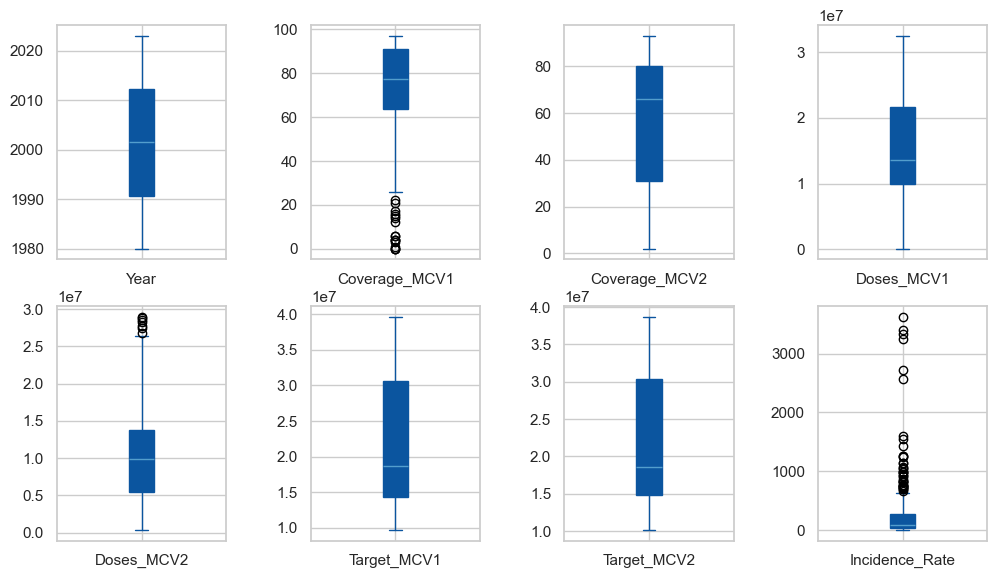

In [109]:
# Boxplot is used to identify the outliers

# select columns to plot
df_to_plot = df.select_dtypes(include=np.number)

# subplots
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

The boxplots reveal that MCV1 generally has higher coverage and more consistent dose administration across regions and years compared to MCV2. There are some outliers below 40%, indicating regions and years where MCV1 coverage was significantly lower. MCV2 coverage shows more variability and lower median values, reflecting the challenges in achieving high coverage for the second dose. The incidence rate of measles shows a significant number of outliers, indicating that despite vaccination efforts, some regions still experienced large outbreaks, particularly where coverage was low. The target populations for both MCV1 and MCV2 are relatively stable, with no major outliers, suggesting consistent planning in vaccination campaigns. Overall, these plots underscore the need to improve MCV2 coverage to achieve more comprehensive immunization and reduce the incidence of measles outbreaks.

#### A Comparative Analysis of 1980-1999 vs. 2000-2023

The introduction of the MCV2 dose in 2000 marked a significant shift in global measles vaccination strategies. To evaluate its impact, this analysis compares the trends in MCV1 and MCV2 coverage with measles incidence rates across six global regions during two distinct periods: 1980-1999 and 2000-2023. By examining these periods separately, we aim to assess the effectiveness of the second dose (MCV2) in reducing measles incidence rates, building upon the foundation established by MCV1 coverage.

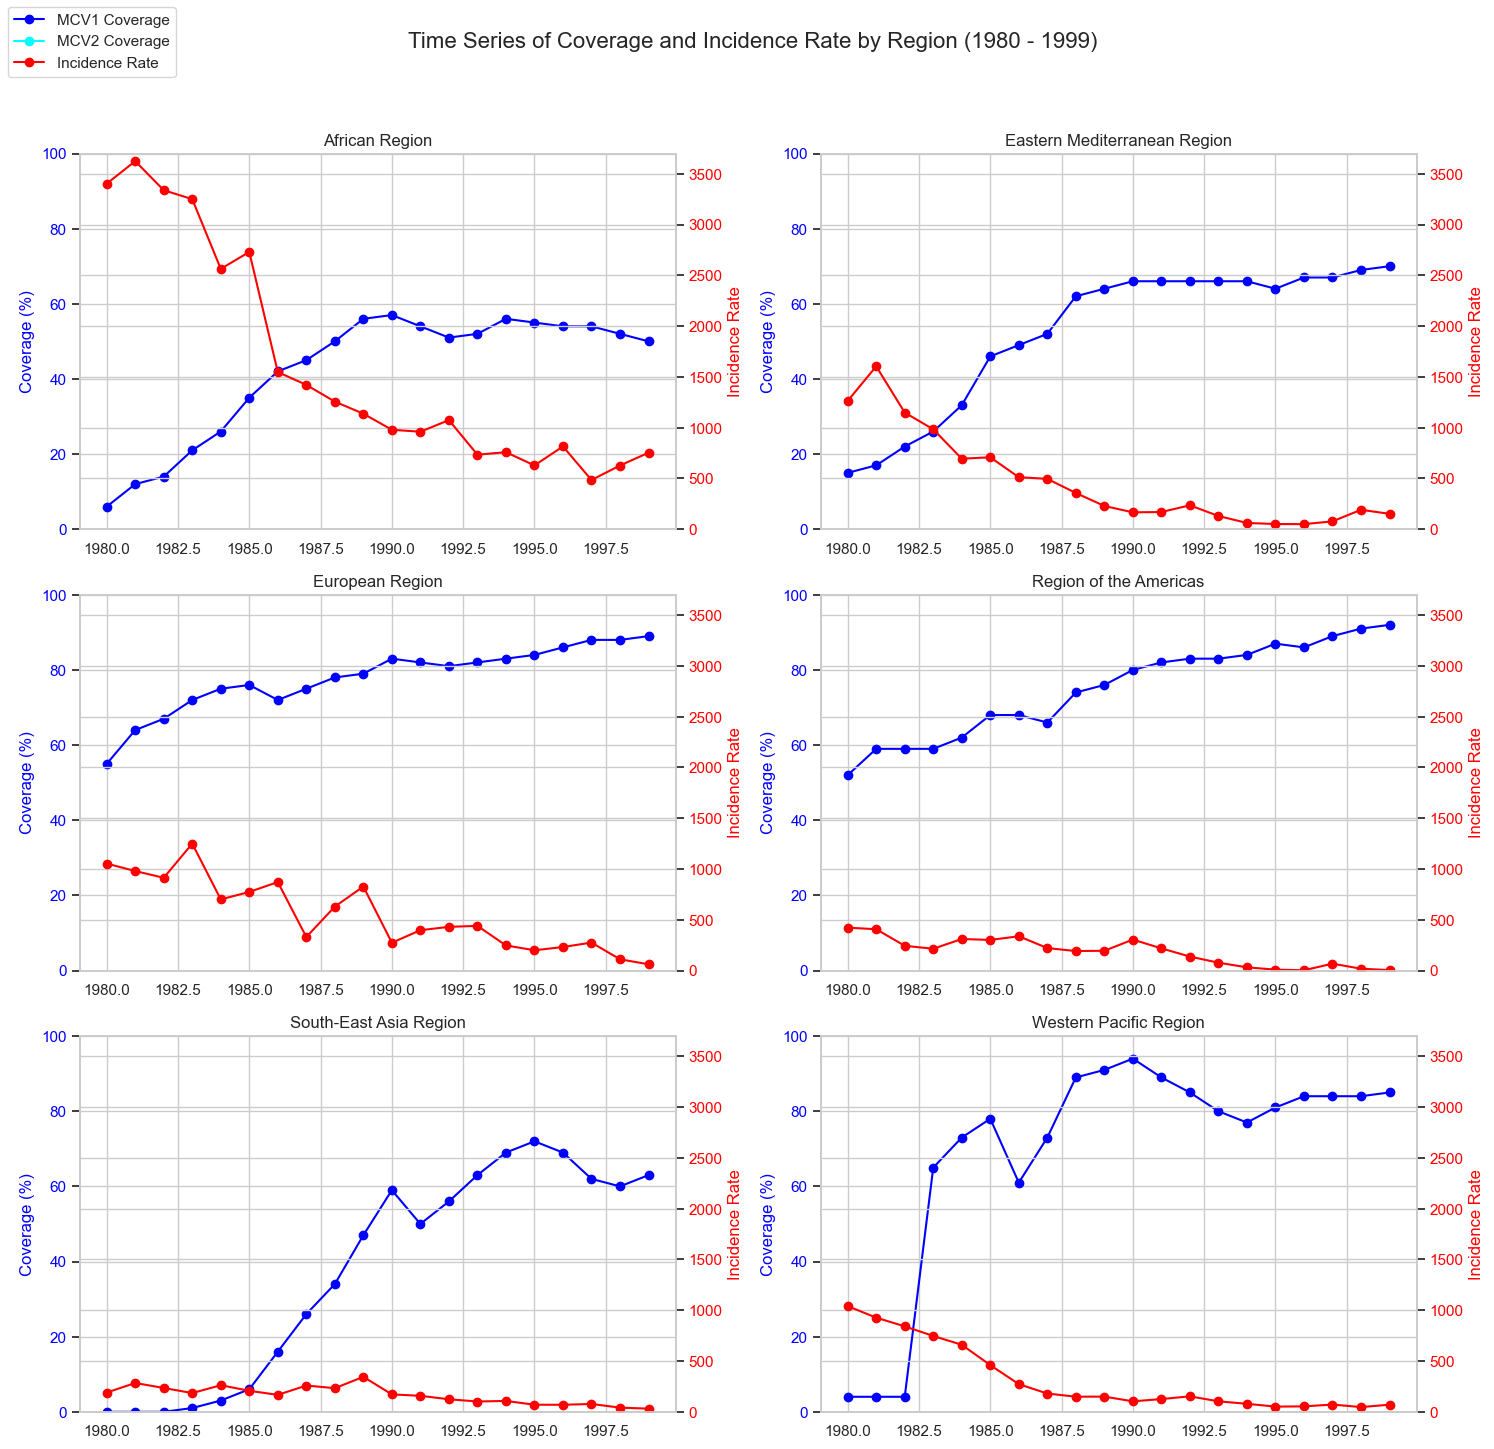

In [112]:
# Filter the DataFrame to include only data from 1980 to 2000
df_1980_2000 = df[(df['Year'] >= 1980) & (df['Year'] <= 1999)]

# Get the list of unique regions
regions = df_1980_2000['Region'].unique()

# Define the grid structure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Define a consistent y-axis limit for Incidence Rate & Coverage across all regions
incidence_rate_ylim = (0, 3700)  # Adjusting the range
coverage_ylim = (0, 100)  # Ensure that Coverage is plotted from 0 to 100%

# Containers for legend handles and labels
coverage_handles_labels = None
incidence_handles_labels = None

# Plot each region
for i, region in enumerate(regions):
    ax = axes[i]
    region_df = df_1980_2000[df_1980_2000['Region'] == region]
    
    # Plot MCV1 Coverage on the left y-axis
    mcv1_line, = ax.plot(region_df['Year'], region_df['Coverage_MCV1'], 
                         color='blue', marker='o', label='MCV1 Coverage')
    
    # Plot MCV2 Coverage on the left y-axis
    mcv2_line, = ax.plot(region_df['Year'], region_df['Coverage_MCV2'], 
                         color='cyan', marker='o', label='MCV2 Coverage')
    
    ax.set_ylabel('Coverage (%)', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_ylim(coverage_ylim)  # Set y-axis limit for Coverage
    
    # Create a twin Axes sharing the x-axis for the Incidence Rate
    ax2 = ax.twinx()
    # Sort the DataFrame by Year to ensure correct order
    sorted_region_df = region_df.sort_values(by='Year')
    incidence_line, = ax2.plot(sorted_region_df['Year'], 
                               sorted_region_df['Incidence_Rate'], 
                               color='red', marker='o', label='Incidence Rate')
    ax2.set_ylabel('Incidence Rate', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(incidence_rate_ylim)  # Set the y-axis limit for Incidence Rate
    
    # Set the title for the subplot
    ax.set_title(region)
    
    # Save the handles and labels from the first subplot for the legend
    if i == 0:
        coverage_handles_labels = [(mcv1_line, 'MCV1 Coverage'), (mcv2_line, 'MCV2 Coverage')]
        incidence_handles_labels = [(incidence_line, 'Incidence Rate')]

# Add a single legend for Coverage and Incidence Rate on the top left
fig.legend(handles=[h[0] for h in coverage_handles_labels + incidence_handles_labels],
           labels=[h[1] for h in coverage_handles_labels + incidence_handles_labels],
           loc='upper left')

# Adjust layout and add a main title
fig.suptitle('Time Series of Coverage and Incidence Rate by Region (1980 - 1999)', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

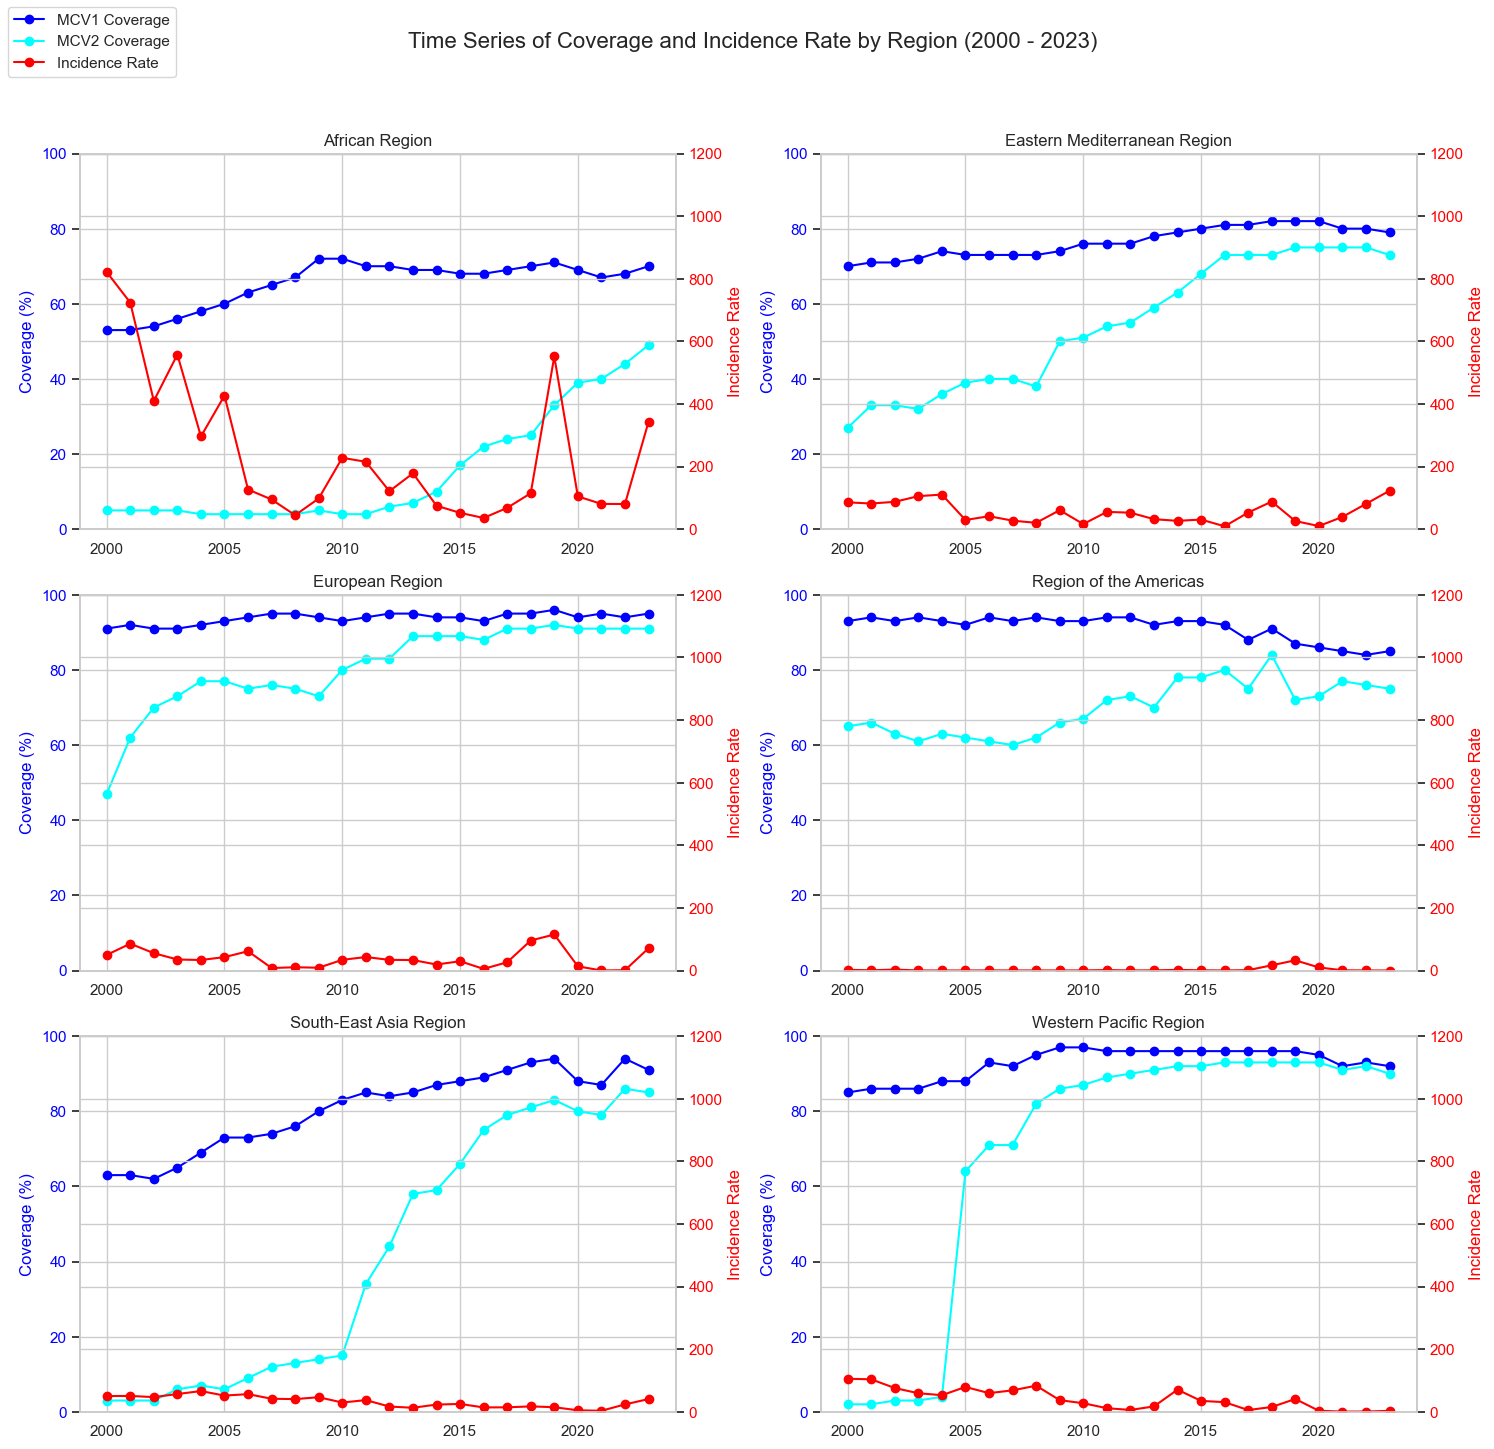

In [113]:
# Filter the DataFrame to include only data from 2000 to 2023
df_2001_2023 = df[(df['Year'] >= 2000) & (df['Year'] <= 2023)]

# Get the list of unique regions
regions = df_2001_2023['Region'].unique()

# Define the grid structure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration

# Define a consistent y-axis limit for Incidence Rate & Coverage across all regions
incidence_rate_ylim = (0, 1200)  # Adjusting the range
coverage_ylim = (0, 100)  # Ensure that Coverage is plotted from 0 to 100%

# Containers for legend handles and labels
coverage_handles_labels = None
incidence_handles_labels = None

# Plot each region
for i, region in enumerate(regions):
    ax = axes[i]
    region_df = df_2001_2023[df_2001_2023['Region'] == region]
    
    # Plot MCV1 Coverage on the left y-axis
    mcv1_line, = ax.plot(region_df['Year'], region_df['Coverage_MCV1'], 
                         color='blue', marker='o', label='MCV1 Coverage')
    
    # Plot MCV2 Coverage on the left y-axis
    mcv2_line, = ax.plot(region_df['Year'], region_df['Coverage_MCV2'], 
                         color='cyan', marker='o', label='MCV2 Coverage')
    
    ax.set_ylabel('Coverage (%)', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    ax.set_ylim(coverage_ylim)  # Set y-axis limit for Coverage
    
    # Create a twin Axes sharing the x-axis for the Incidence Rate
    ax2 = ax.twinx()
    # Sort the DataFrame by Year to ensure correct order
    sorted_region_df = region_df.sort_values(by='Year')
    incidence_line, = ax2.plot(sorted_region_df['Year'], 
                               sorted_region_df['Incidence_Rate'], 
                               color='red', marker='o', label='Incidence Rate')
    ax2.set_ylabel('Incidence Rate', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(incidence_rate_ylim)  # Set the y-axis limit for Incidence Rate
    
    # Set the title for the subplot
    ax.set_title(region)
    
    # Save the handles and labels from the first subplot for the legend
    if i == 0:
        coverage_handles_labels = [(mcv1_line, 'MCV1 Coverage'), (mcv2_line, 'MCV2 Coverage')]
        incidence_handles_labels = [(incidence_line, 'Incidence Rate')]

# Add a single legend for Coverage and Incidence Rate on the top left
fig.legend(handles=[h[0] for h in coverage_handles_labels + incidence_handles_labels],
           labels=[h[1] for h in coverage_handles_labels + incidence_handles_labels],
           loc='upper left')

# Adjust layout and add a main title
fig.suptitle('Time Series of Coverage and Incidence Rate by Region (2000 - 2023)', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


Key Findings:

African Region:

- In the period from 1980 to 1999, the African region experienced a significant decline in incidence rates as MCV1 coverage increased steadily. However, fluctuations in incidence rates continued due to inconsistent coverage levels. Post-2000, the introduction of MCV2 saw MCV1 coverage stabilize around 70%, but MCV2 coverage lagged behind. Between 2017 and 2020, the region faced a measles outbreak; however, the increasing coverage of MCV2 helped contain the impact, preventing the incidence rates from reaching the high levels observed between 2000 and 2013. This suggests that while first-dose vaccination efforts have been relatively successful, additional focus is needed to enhance the coverage of the second dose to further reduce the incidence rate.

Eastern Mediterranean Region:

- During the earlier period (1980-1999), the Eastern Mediterranean region achieved a stable increase in MCV1 coverage, leading to a noticeable reduction in incidence rates. After 2000, MCV2 coverage gradually improved, although it remains lower than MCV1. Notably, between 2017 and 2020, the region experienced an outbreak, but the growing MCV2 coverage helped to contain the impact, preventing a significant spike in incidence rates. The steady increase in MCV2 coverage indicates a positive trend, but continued efforts are necessary to close the gap between MCV1 and MCV2 coverage.

European Region:

- The European region maintained high MCV1 coverage throughout the 1980-1999 period, which corresponded with a stable and low incidence rate. The post-2000 period shows that MCV2 coverage quickly caught up to MCV1 levels, further supporting the reduction in incidence rates. During the 2017-2020 period, the region faced an outbreak; however, the high coverage of both MCV1 and MCV2 effectively contained the outbreak's impact, resulting in a relatively stable incidence rate compared to the pre-2000 period. This trend underscores the importance of comprehensive coverage of both MCV1 and MCV2 in effectively controlling measles outbreaks.

Region of the Americas:

- From 1980 to 1999, the Americas region saw a steady increase in MCV1 coverage, which helped lower incidence rates. After 2000, MCV2 coverage also increased but showed some variability. Despite this, the region has maintained a low incidence rate, highlighting the effectiveness of robust vaccination programs. Further stabilization of MCV2 coverage could help bring incidence rates even lower.

South-East Asia Region:

- In the earlier period, South-East Asia saw a marked improvement in MCV1 coverage, leading to a decline in incidence rates. However, post-2000, MCV2 coverage showed a significant delay in catching up, only beginning to rise around the mid-2000s. This delay has likely contributed to the ongoing fluctuations in incidence rates, emphasizing the need for continued efforts to raise MCV2 coverage.

Western Pacific Region:

- The Western Pacific region experienced significant improvements in MCV1 coverage by 1999, reducing incidence rates substantially. Post-2000, MCV2 coverage rapidly increased to match MCV1 levels, reflecting successful vaccination campaigns. Despite some variability, the incidence rate has remained relatively low, indicating that high coverage of both MCV1 and MCV2 is crucial for sustained measles control.

Impact of MCV2 (Post-2000):

- The introduction of MCV2 has generally had a positive impact on reducing measles incidence rates across all regions. However, the effectiveness of MCV2 is contingent on achieving coverage levels comparable to MCV1. Regions with lower MCV2 coverage continue to experience fluctuations in incidence rates, highlighting the critical role of the second dose in achieving comprehensive measles control. As seen in the post-2000 data, regions that successfully raised MCV2 coverage closer to MCV1 levels, such as the European and Western Pacific regions, have observed more stable and lower incidence rates, reinforcing the importance of full immunization coverage with both doses. The 2017-2020 outbreaks further demonstrate that higher MCV2 coverage can mitigate the impact of outbreaks, preventing incidence rates from reaching levels observed in the pre-2000 period.

#### Correlation Matrix

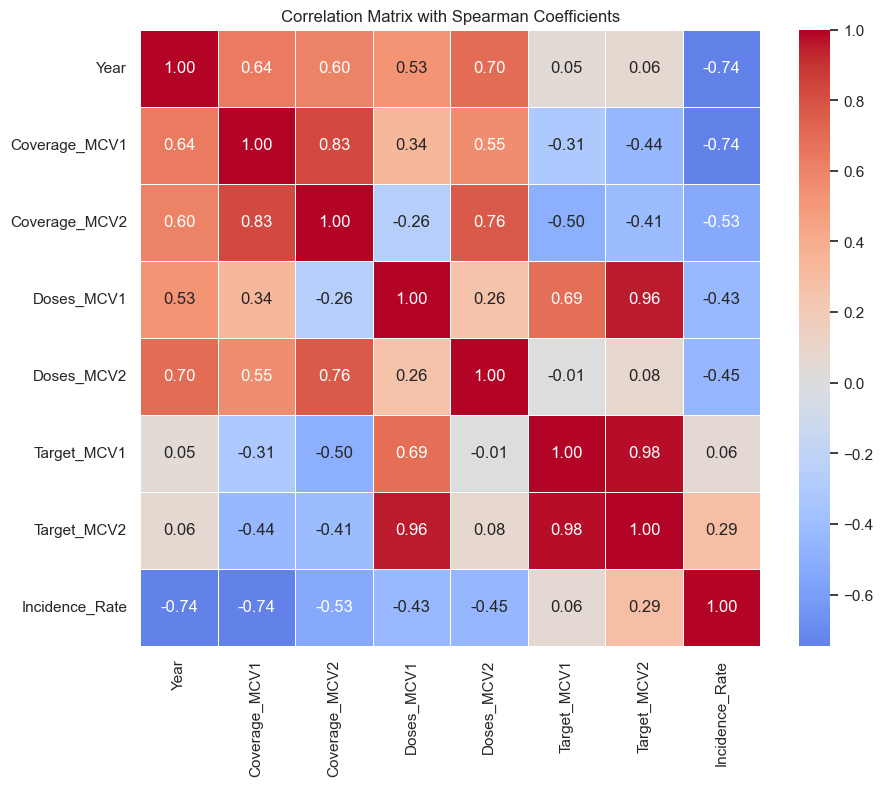

In [116]:
# Calculate the correlation matrix using the Spearman method
corrs = df.select_dtypes(include=np.number).corr(method='spearman')

# Create a heatmap with annotations for the correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(corrs, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5)

plt.title('Correlation Matrix with Spearman Coefficients')
plt.show()

Key Findings:

Year and Incidence Rate:

- There is a strong negative correlation between the year and the incidence rate (-0.74). This suggests that over time, the incidence rate of measles has generally decreased, indicating the overall effectiveness of the vaccination programs.
Coverage of MCV1 and MCV2:

Coverage_MCV1 and Incidence_Rate:

- There is a strong negative correlation (-0.74) between MCV1 coverage and the incidence rate. This indicates that as the coverage of the first dose (MCV1) increases, the incidence rate of measles significantly decreases. This strong correlation highlights the importance of the first dose in reducing measles outbreaks.

Coverage_MCV2 and Incidence_Rate:

- The correlation between MCV2 coverage and the incidence rate is also negative, though slightly weaker (-0.53) compared to MCV1. This suggests that while the second dose (MCV2) is also effective in reducing measles incidence, its impact is not as strong as the first dose. This could be due to the already lowered incidence rate following the first dose or potential challenges in achieving higher coverage for the second dose.

Interrelationship Between MCV1 and MCV2:

- The correlation between MCV1 and MCV2 coverage is quite high (0.83), indicating that regions with high MCV1 coverage tend to also have relatively high MCV2 coverage. However, the slightly lower correlation with the incidence rate for MCV2 suggests that the incremental benefit of the second dose, while significant, might be less impactful compared to the first dose.


Other Correlations:

- Doses_MCV1 and Incidence_Rate: A moderate negative correlation (-0.43) suggests that the number of doses administered for MCV1 is inversely related to the incidence rate, further emphasizing the role of vaccination in controlling the disease.
 
- Doses_MCV2 and Incidence_Rate: Similarly, the correlation for MCV2 doses (-0.45) mirrors that of MCV1, indicating that the administration of the second dose also contributes to reducing measles cases.

The analysis of this correlation matrix suggests that both doses of the vaccine (MCV1 and MCV2) play significant roles in reducing the incidence of measles, with the first dose (MCV1) having the most substantial impact. Continued focus on increasing coverage for both doses, with particular emphasis on the first dose, is essential for controlling and eventually eradicating measles.

#### Impact of MCV1 and MCV2 Coverage on Measles Incidence Rates

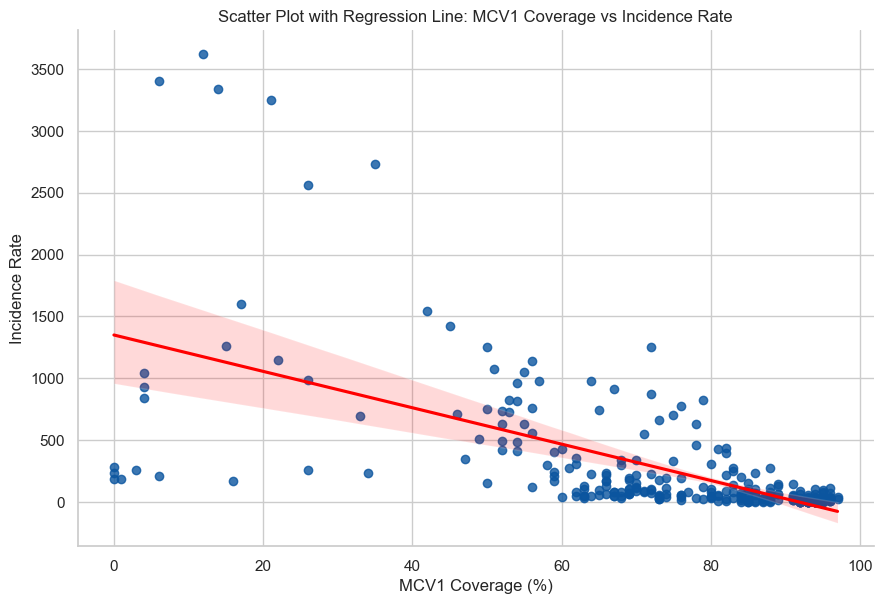

In [119]:
# Scatter Plot with Regression Line (MCV1 vs Incidence Rate)

sns.lmplot(x='Coverage_MCV1', y='Incidence_Rate', data=df, aspect=1.5, height=6, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: MCV1 Coverage vs Incidence Rate')
plt.xlabel('MCV1 Coverage (%)')
plt.ylabel('Incidence Rate')
plt.show()

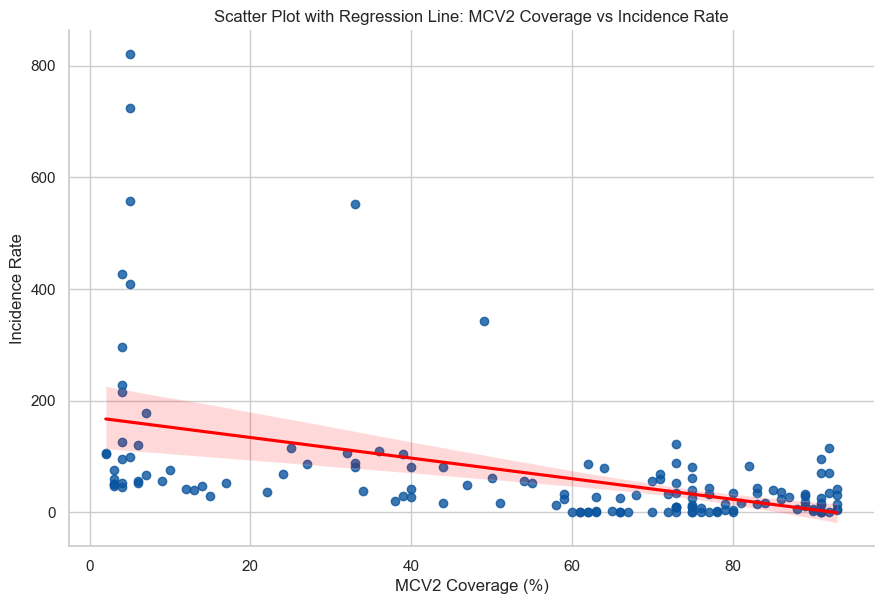

In [120]:
# Scatter Plot with Regression Line (MCV2 vs Incidence Rate)

sns.lmplot(x='Coverage_MCV2', y='Incidence_Rate', data=df, aspect=1.5, height=6, line_kws={'color': 'red'})
plt.title('Scatter Plot with Regression Line: MCV2 Coverage vs Incidence Rate')
plt.xlabel('MCV2 Coverage (%)')
plt.ylabel('Incidence Rate')
plt.show()

Key Findings:

MCV1 Coverage vs. Incidence Rate:

- The scatter plot illustrates a clear negative correlation between MCV1 coverage and the incidence rate of measles. As the MCV1 coverage increases, the incidence rate decreases significantly. This relationship highlights the critical role of the first dose of the measles vaccine (MCV1) in controlling and reducing the spread of measles.

- Despite the overall negative trend, the scatter shows a wider spread of incidence rates at lower coverage levels, indicating that when MCV1 coverage is below 60%, the incidence rate is more variable and can be quite high. As coverage approaches 100%, the incidence rates stabilize at much lower levels, underscoring the importance of high MCV1 coverage.


MCV2 Coverage vs. Incidence Rate:

- The second scatter plot depicts the relationship between MCV2 coverage and the incidence rate. Similar to MCV1, there is a negative correlation, but the trend is less pronounced. This suggests that while MCV2 is effective in further reducing measles incidence, its impact is somewhat supplementary to MCV1.

- The scatter points for MCV2 coverage reveal a much narrower spread in incidence rates compared to MCV1, especially as coverage exceeds 60%. This suggests that MCV2 contributes to maintaining lower and more stable incidence rates, particularly in regions where the first dose (MCV1) has already achieved high coverage.


Summary:

- Both MCV1 and MCV2 vaccinations play a crucial role in controlling measles incidence rates. MCV1 coverage has a stronger and more immediate impact on reducing incidence, but the introduction and increased coverage of MCV2 since 2000 have contributed to maintaining lower incidence rates, particularly during outbreaks. This analysis underscores the importance of achieving high coverage for both vaccine doses to effectively control and prevent measles outbreaks.

#### MCV1 and MCV2 Coverage Impact on Measles Incidence Rates Across Global Regions

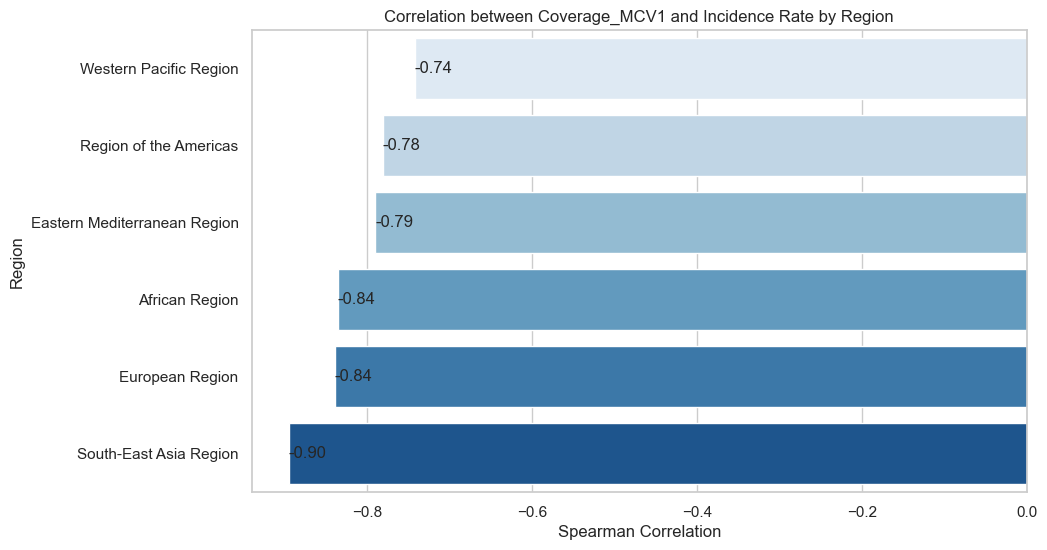

In [123]:
# Calculate correlation for each region over the entire time period (MCV1)

regions = df['Region'].unique()
correlations = []

for region in regions:
    region_df = df[df['Region'] == region]
    corr = region_df['Coverage_MCV1'].corr(region_df['Incidence_Rate'], method='spearman')
    correlations.append((region, corr))

# Convert the list of tuples to a DataFrame
corr_df = pd.DataFrame(correlations, columns=['Region', 'Correlation'])

# Sort the DataFrame by Correlation
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Region', data=corr_df, palette='Blues')

# Add labels to each bar
for index, value in enumerate(corr_df['Correlation']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Correlation between Coverage_MCV1 and Incidence Rate by Region')
plt.xlabel('Spearman Correlation')
plt.show()

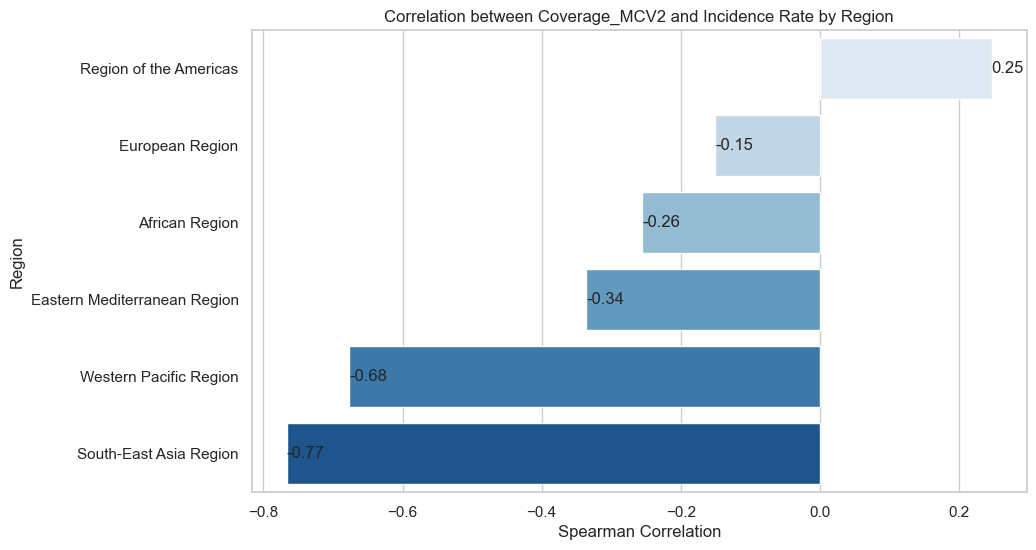

In [124]:
# Calculate correlation for each region over the entire time period (MCV2)

regions = df['Region'].unique()
correlations = []

for region in regions:
    region_df = df[df['Region'] == region]
    corr = region_df['Coverage_MCV2'].corr(region_df['Incidence_Rate'], method='spearman')
    correlations.append((region, corr))

# Convert the list of tuples to a DataFrame
corr_df = pd.DataFrame(correlations, columns=['Region', 'Correlation'])

# Sort the DataFrame by Correlation
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Region', data=corr_df, palette='Blues')

# Add labels to each bar
for index, value in enumerate(corr_df['Correlation']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Correlation between Coverage_MCV2 and Incidence Rate by Region')
plt.xlabel('Spearman Correlation')
plt.show()

Key Findings:

MCV1 Coverage and Incidence Rate:

- The correlation between MCV1 coverage and incidence rate is strongly negative across all regions, indicating that higher MCV1 coverage consistently correlates with lower measles incidence rates. The South-East Asia Region shows the strongest negative correlation (-0.90), highlighting the effectiveness of MCV1 in controlling measles in this area. The African and European regions also show significant negative correlations (-0.84), underscoring the critical role of MCV1 in reducing disease incidence.

MCV2 Coverage and Incidence Rate:

- The correlation between MCV2 coverage and incidence rate is more variable across regions. The South-East Asia Region again shows a strong negative correlation (-0.77), indicating that higher MCV2 coverage is associated with lower incidence rates, although not as strongly as MCV1. In contrast, the Region of the Americas presents a positive correlation (0.25), suggesting that the increase in MCV2 coverage has not yet translated into a reduced incidence rate, possibly due to other confounding factors.

Regional Variations:

- In regions like the Western Pacific and Eastern Mediterranean, MCV2 coverage has a moderate to weak negative correlation with incidence rates (-0.68 and -0.34, respectively). Similarly, the African Region and European Region exhibit weaker negative correlations with MCV2 coverage (-0.26 and -0.15, respectively) compared to MCV1. This could indicate that while MCV1 is well-established and highly effective, MCV2's impact is still emerging or being influenced by other regional health factors.
  
Summary:

- The analysis underscores the critical importance of MCV1 in controlling measles across all regions, with consistently strong negative correlations between MCV1 coverage and incidence rates. While MCV2 also plays a role in reducing measles incidence, its impact varies more significantly across different regions, with some regions still facing challenges in translating increased MCV2 coverage into lower incidence rates.

- In analyzing the correlation between MCV2 coverage and incidence rates, the results present some unexpected findings, particularly the positive correlation observed in the Region of the Americas. Typically, we would expect higher MCV2 coverage to correlate with lower incidence rates, but this isn't consistently reflected across all regions. Several factors may explain these discrepancies, including potential data quality issues, delays in reporting, and the possibility that MCV1 coverage alone has already established sufficient herd immunity in some areas. Additionally, outbreaks, programmatic challenges, or a time lag in realizing the benefits of MCV2 might contribute to these atypical correlations. 

#### Comparative Analysis of MCV1 and MCV2 Coverage Across Global Regions

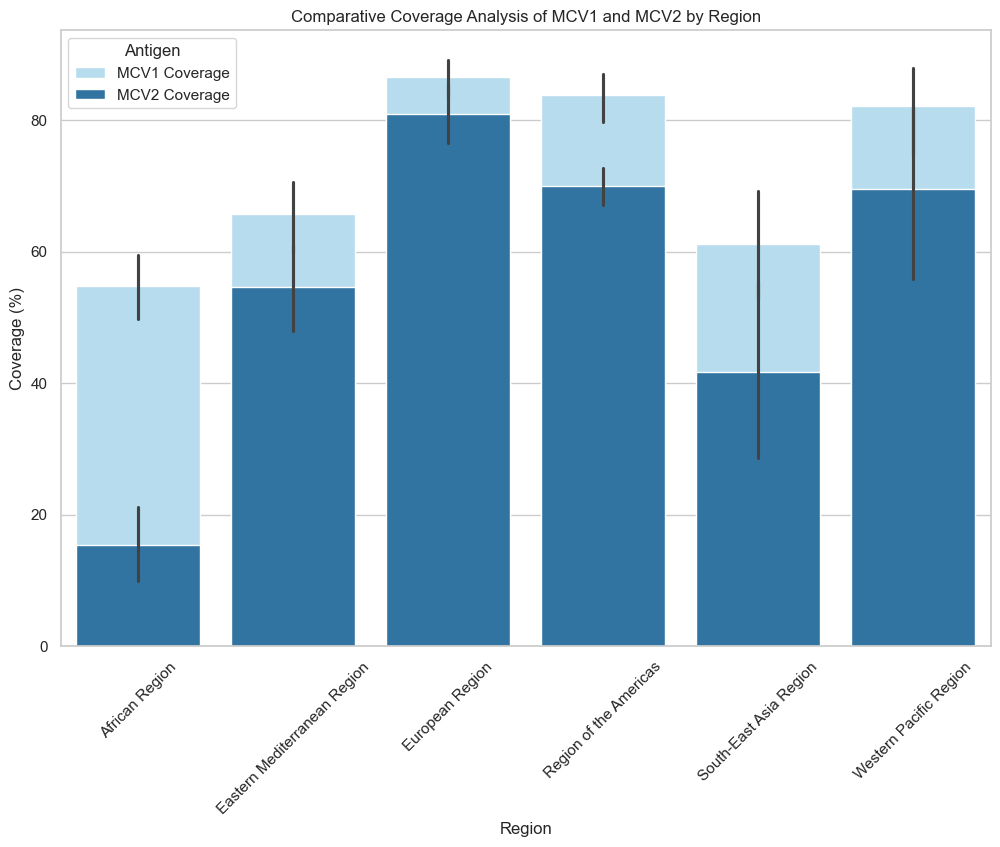

In [127]:
# Create a bar plot for Coverage_MCV1 and Coverage_MCV2
plt.figure(figsize=(12, 8))

# Plot MCV1 Coverage
sns.barplot(x='Region', y='Coverage_MCV1', data=df, color='#AEDFF7', label='MCV1 Coverage')

# Plot MCV2 Coverage on top of the MCV1 bars
sns.barplot(x='Region', y='Coverage_MCV2', data=df, color='#1F77B4', label='MCV2 Coverage')

# Adding title and labels
plt.title('Comparative Coverage Analysis of MCV1 and MCV2 by Region')
plt.ylabel('Coverage (%)')
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Antigen')

plt.show()

Key Findings:

African Region: 

- The coverage for MCV1 in the African region is higher than MCV2, with MCV1 coverage around 55% and MCV2 coverage notably lower, hovering below 20%. This significant gap between the two doses indicates the need for increased efforts in administering the second dose to enhance immunity against measles.

Eastern Mediterranean Region:

- In this region, MCV1 coverage is just below 70%, while MCV2 coverage lags behind at around 55%. Although both doses show relatively high coverage, the gap between MCV1 and MCV2 suggests room for improvement in ensuring more individuals receive both doses.

European Region:

- The European region exhibits the highest coverage for both MCV1 and MCV2, with MCV1 coverage close to 90% and MCV2 around 80%. The small gap between the two doses demonstrates effective vaccination campaigns, contributing to sustained control over measles outbreaks in this region.

Region of the Americas:

- The Americas show a strong performance, with MCV1 coverage at around 85% and MCV2 coverage slightly lower, around 70%. The relatively small gap highlights effective immunization strategies, but continuous efforts are required to close this gap further.

South-East Asia Region:

- This region shows moderate coverage for both MCV1 and MCV2, with MCV1 around 60% and MCV2 significantly lower at approximately 40%. The large gap indicates a need for enhanced focus on the second dose to ensure comprehensive protection against measles.

Western Pacific Region:

- Similar to the European region, the Western Pacific region shows high coverage for both doses, with MCV1 around 82% and MCV2 close to 70%. The narrow gap between the two doses reflects the success of vaccination campaigns in this region, contributing to a low incidence rate of measles.

Overall Analysis:

- The comparison across regions reveals that while many areas have achieved high coverage for the first dose (MCV1), there remains a significant gap in coverage for the second dose (MCV2) in several regions. This disparity underscores the need for targeted interventions to increase MCV2 coverage, which is critical for achieving and maintaining herd immunity and preventing measles outbreaks. The effectiveness of vaccination campaigns is evident in regions with high coverage for both doses, as these areas report lower incidence rates of measles.

#### Relationship Between MCV1 and MCV2 Coverage

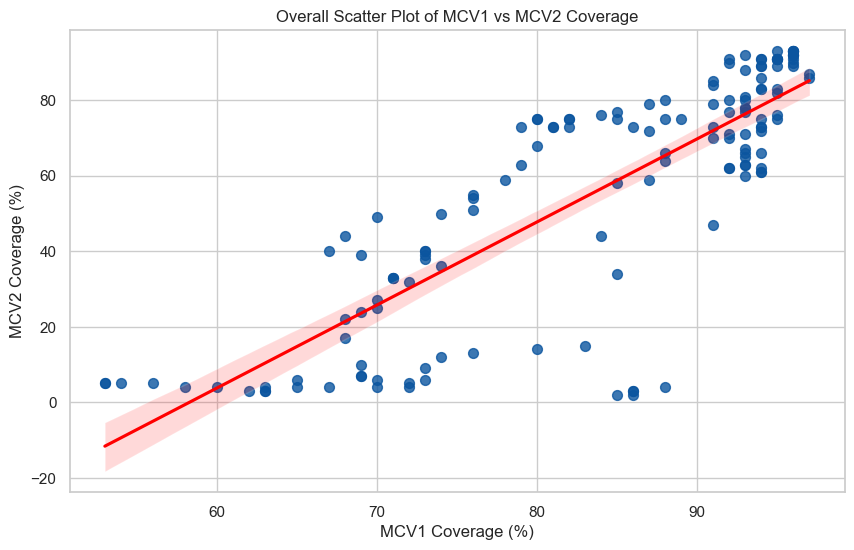

In [130]:
# Create an overall scatter plot with a regression line of MCV1 and MCV2 Coverage
plt.figure(figsize=(10, 6))
sns.regplot(x='Coverage_MCV1', y='Coverage_MCV2', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add labels and title
plt.title('Overall Scatter Plot of MCV1 vs MCV2 Coverage')
plt.xlabel('MCV1 Coverage (%)')
plt.ylabel('MCV2 Coverage (%)')

plt.show()

Key Findings:

The plot reveals that as MCV1 coverage increases, MCV2 coverage also tends to increase. This relationship is quite consistent, as shown by the tight clustering of data points around the regression line, particularly at higher coverage levels.

The results underscore the importance of achieving high coverage for the first dose (MCV1) as a foundation for improving coverage of the second dose (MCV2). It also highlights that in regions where MCV1 coverage is lower, targeted strategies may be necessary to ensure that MCV2 coverage improves correspondingly.

Overall, the strong positive correlation suggests that successful immunization programs for the first dose have a direct and positive impact on the uptake of the second dose, which is crucial for achieving comprehensive measles immunity.

#### High MCV1 & MCV2 Coverage vs High MCV1 Only

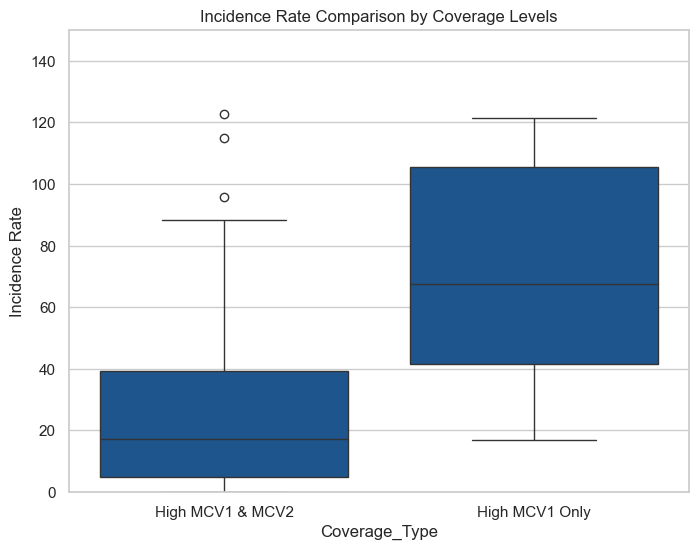

Mean Incidence Rate with High MCV1 & MCV2 Coverage: 27.85
Mean Incidence Rate with High MCV1 Only Coverage: 101.04
T-statistic: -3.59, P-value: 0.0011


In [133]:
from scipy.stats import ttest_ind

# Define thresholds for high coverage
high_coverage_threshold = 70
low_coverage_threshold = 50

# Segment data
high_both = df[(df['Coverage_MCV1'] >= high_coverage_threshold) & (df['Coverage_MCV2'] >= high_coverage_threshold)]
high_mcv1_only = df[(df['Coverage_MCV1'] >= high_coverage_threshold) & (df['Coverage_MCV2'] < low_coverage_threshold)]

# Calculate mean incidence rates
mean_incidence_high_both = high_both['Incidence_Rate'].mean()
mean_incidence_high_mcv1_only = high_mcv1_only['Incidence_Rate'].mean()

# Perform t-test
t_stat, p_value = ttest_ind(high_both['Incidence_Rate'], high_mcv1_only['Incidence_Rate'], equal_var=False)

# Prepare data for boxplot
box_data = pd.DataFrame({
    'Coverage_Type': ['High MCV1 & MCV2'] * len(high_both) + ['High MCV1 Only'] * len(high_mcv1_only),
    'Incidence_Rate': pd.concat([high_both['Incidence_Rate'], high_mcv1_only['Incidence_Rate']])
})

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Coverage_Type', y='Incidence_Rate', data=box_data)

# Setting the y-axis limit to improve visibility of the box plots
plt.ylim(0, 150)

# Add the title and label for the y-axis
plt.title('Incidence Rate Comparison by Coverage Levels')
plt.ylabel('Incidence Rate')
plt.show()

# Output the results
print(f"Mean Incidence Rate with High MCV1 & MCV2 Coverage: {mean_incidence_high_both:.2f}")
print(f"Mean Incidence Rate with High MCV1 Only Coverage: {mean_incidence_high_mcv1_only:.2f}")
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


Key Findings:

In this analysis, the incidence rates were compared between regions with high coverage of both MCV1 and MCV2 vaccines versus regions with high coverage of MCV1 only. The high coverage threshold was set at 70%, and the low coverage threshold was set at 50%.

The results demonstrate a clear difference in the incidence rates between the two groups. Regions with high coverage of both MCV1 and MCV2 vaccines exhibited a significantly lower median incidence rate of approximately 18 per million, with a mean incidence rate of 27.85 per million. In contrast, regions with high coverage of MCV1 only had a higher median incidence rate of approximately 68 per million, with a mean incidence rate of 101.04 per million.

The t-test analysis further supports this observation, yielding a t-statistic of -3.59 and a p-value of 0.0011, indicating a statistically significant difference between the two groups. This suggests that regions achieving high coverage of both MCV1 and MCV2 vaccines are more effective in reducing the incidence of measles compared to regions that only achieve high coverage of MCV1.

These findings emphasize the importance of achieving high coverage for both doses of the measles vaccine. Public health strategies should focus on not only maintaining but also increasing MCV2 coverage to ensure sustained and robust protection against measles outbreaks. This analysis highlights the crucial role of a comprehensive vaccination approach, where both MCV1 and MCV2 are essential in significantly reducing the incidence of measles, thereby preventing outbreaks and safeguarding public health.

### Insights & Recommendations

#### Insights:

The analysis conducted provides a comprehensive understanding of the impact of MCV2 (the second dose of the measles-containing vaccine) on measles incidence rates across different global regions from 1980 to 2023. The comparison between the time periods of 1980-1999 (pre-MCV2) and 2000-2023 (post-MCV2 introduction) highlights several key findings:


Impact of MCV1 and MCV2 on Incidence Rate:

- The introduction and widespread adoption of MCV1 significantly reduced the incidence of measles across all regions. However, the data reveals that the addition of MCV2 further strengthened measles control efforts. Regions with high coverage of both MCV1 and MCV2 consistently demonstrated lower incidence rates compared to regions with high MCV1 coverage alone.

- Specifically, the scatter plots and correlation analysis show a stronger negative correlation between MCV1 coverage and incidence rates compared to MCV2. This indicates that while MCV1 plays a critical role in reducing measles cases, MCV2 coverage provides additional protection, especially in regions where measles outbreaks were previously common.


Comparison Between High MCV1 & MCV2 Coverage vs. High MCV1 Only:

- A detailed analysis comparing regions with high coverage of both MCV1 and MCV2 against regions with high MCV1 coverage only reveals a significant difference in incidence rates. Regions with high coverage of both doses had a mean incidence rate of 27.85 cases per 100,000, compared to 101.04 cases per 100,000 in regions with high MCV1 coverage only.

- This stark contrast was further supported by a t-test, which showed a statistically significant difference between the two groups, with a t-statistic of -3.59 and a p-value of 0.0011. This confirms the hypothesis that administering both doses (MCV1 and MCV2) is far more effective in reducing measles incidence rates than relying on the first dose alone.


Regional Variations:

African Region:
- The African region exhibited significant improvements in measles control with the introduction of MCV1. However, between 2017 and 2020, there were outbreaks in this region. The increasing coverage of MCV2 during this period helped contain the outbreaks, preventing them from leading to very high incidence rates as seen before 2010 (low MCV2 coverage).

Eastern Mediterranean Region:
- Similar to the African region, the Eastern Mediterranean region saw a stable decline in incidence rates post-MCV2 introduction. The outbreak during 2017-2020 was better contained, reflecting the importance of MCV2 in managing disease spread.

European Region:
- The European region, which had maintained high MCV1 coverage, benefited greatly from the addition of MCV2, leading to a consistent reduction in incidence rates. The region's response to the 2017-2020 outbreak was more effective due to the increased MCV2 coverage.

Region of the Americas:

- Although the Region of the Americas exhibited a weak positive correlation (0.25) between MCV2 coverage and incidence rates, indicating that higher MCV2 coverage didn't necessarily reduce incidence rates in this region, the overall high coverage of both doses has contributed to low incidence rates.

Western Pacific Region:
- The Western Pacific region showed a strong negative correlation (-0.68) between MCV2 coverage and incidence rates, indicating that higher MCV2 coverage significantly contributed to reducing measles cases in the region.

South-East Asia Region:
- This region displayed the strongest negative correlation (-0.77) between MCV2 coverage and incidence rates, highlighting the critical role of the second dose in controlling measles in this region.


Correlation Analysis:

- The correlation analysis revealed a strong negative correlation between MCV1 coverage and incidence rates across all regions, confirming the vaccine's effectiveness in reducing measles cases.

- The correlation between MCV2 coverage and incidence rates was also significant in several regions, especially in South-East Asia and the Western Pacific, highlighting the importance of MCV2 in further reducing measles incidence.

#### Recommendations:

Increase Focus on MCV2 Coverage:

- While MCV1 remains a cornerstone of measles prevention, increasing MCV2 coverage is essential to achieve further reductions in incidence rates. Public health campaigns should emphasize the importance of completing the two-dose regimen, particularly in regions where MCV2 coverage lags behind MCV1.

Targeted Outbreak Response:

- Regions that experienced outbreaks between 2017-2020 should continue to strengthen their vaccination strategies, particularly focusing on maintaining and increasing MCV2 coverage. Rapid response mechanisms should be put in place to address potential gaps in vaccination coverage during outbreaks.

Address Regional Disparities:

- Although the Region of the Americas showed a weaker positive correlation between MCV2 coverage and reduced incidence rates, further investigation is required to understand the underlying factors.


Sustain Immunization Efforts Post-Pandemic:

- Given the global disruptions caused by the COVID-19 pandemic, it is crucial to reinforce immunization efforts, particularly for MCV2, to prevent any resurgence of measles cases. Catch-up campaigns and public awareness initiatives should be prioritized to recover lost ground in vaccination coverage.

Continuous Monitoring and Research:

- Ongoing monitoring of vaccination coverage and incidence rates is essential to adapt strategies as needed. Further research should explore the regional differences in MCV2's impact on incidence rates to optimize vaccination programs and achieve global measles elimination goals.

This analysis underlines the critical role of both MCV1 and MCV2 in controlling measles and highlights the need for sustained and focused immunization efforts to protect against future outbreaks.